In [12]:
import math
import numpy as np
import pandas as pd
# This line allows plots to show in the Jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt
import io
import requests
from scipy.stats import norm
from IPython import display

Little side notes; when collecting data we mixed things up and so our Thorium/Unknown Data is in 5s intervals, not 10s. Also included regular plots because it helped visual the data more

In [2]:
## Question 1
ThoriumData = pd.read_csv('RadiationSensorThoriumInsideData.csv')
UnknownData = pd.read_csv('RadiationSensorUnknownInsideData.csv')
UnknownSpectrometer = pd.read_csv('unknown_2021-11-10_D3S.csv')
ThoriumSpectrometer = pd.read_csv('Thorium_2021-11-10_D3S.csv')

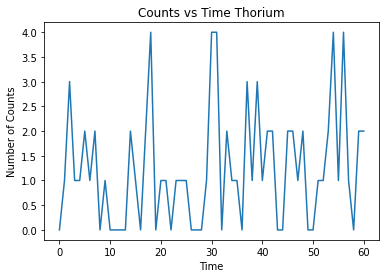

In [3]:
## Question 2 
plt.plot(ThoriumData['# of Counts Detected within Interval'])
plt.ylabel('Number of Counts') 
plt.xlabel('Time')                    
plt.title("Counts vs Time Thorium")                                 
plt.show()


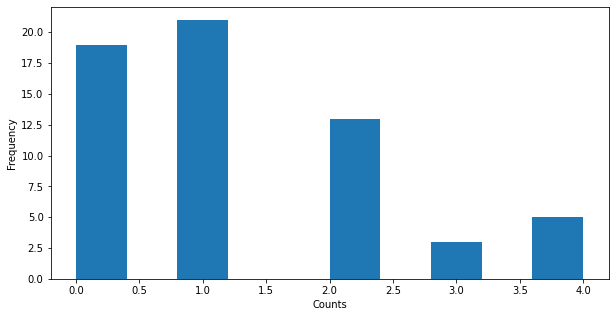

In [21]:
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
fig1.canvas.draw()
ax1.clear()
plt.hist(ThoriumData['# of Counts Detected within Interval'],bins = 10)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Counts")
fig1.canvas.draw()
display.display(plt.gcf())
display.clear_output(wait=True)

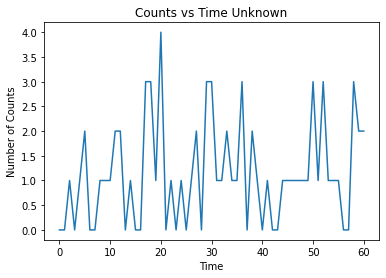

In [4]:
plt.plot(UnknownData['# of Counts Detected within Interval'])
plt.ylabel('Number of Counts') 
plt.xlabel('Time')                    
plt.title("Counts vs Time Unknown")                                 
plt.show()

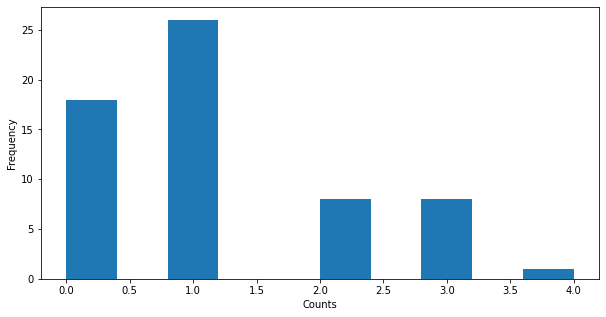

In [22]:
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
fig1.canvas.draw()
ax1.clear()
plt.hist(UnknownData['# of Counts Detected within Interval'],bins = 10)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Counts")
fig1.canvas.draw()
display.display(plt.gcf())
display.clear_output(wait=True)

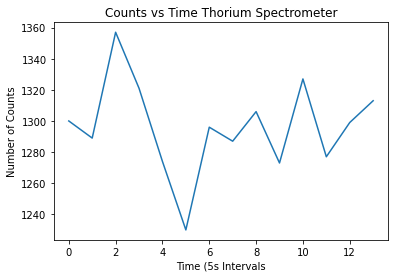

In [5]:
plt.plot(ThoriumSpectrometer.sum(axis=1))
plt.ylabel('Number of Counts') 
plt.xlabel('Time (5s Intervals')                    
plt.title("Counts vs Time Thorium Spectrometer")                                 
plt.show()

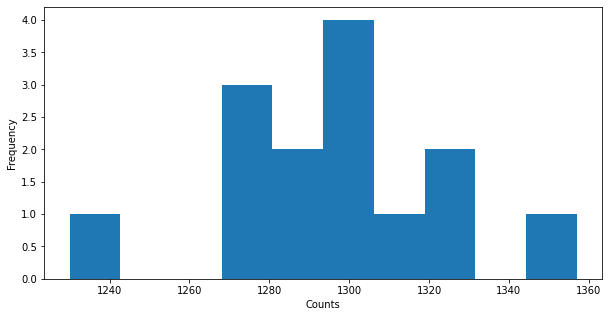

In [23]:
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
fig1.canvas.draw()
ax1.clear()
plt.hist(ThoriumSpectrometer.sum(axis=1),bins = 10)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Counts")
fig1.canvas.draw()
display.display(plt.gcf())
display.clear_output(wait=True)

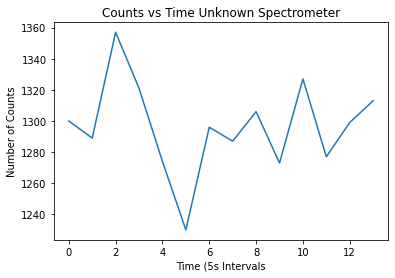

In [6]:
plt.plot(UnknownSpectrometer.sum(axis=1))
plt.ylabel('Number of Counts') 
plt.xlabel('Time (5s Intervals')                    
plt.title("Counts vs Time Unknown Spectrometer")                                 
plt.show()

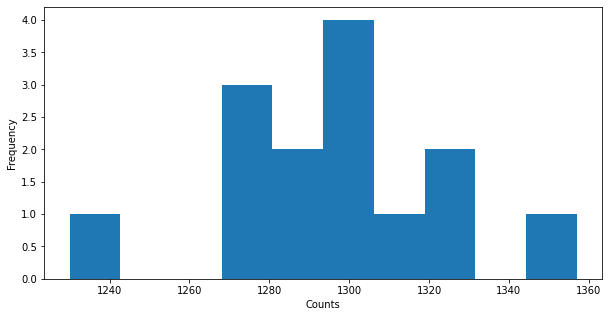

In [24]:
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
fig1.canvas.draw()
ax1.clear()
plt.hist(UnknownSpectrometer.sum(axis=1),bins = 10)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Counts")
fig1.canvas.draw()
display.display(plt.gcf())
display.clear_output(wait=True)

In [7]:
mu1 = np.mean(ThoriumData['# of Counts Detected within Interval'])
sig1 = np.std(ThoriumData['# of Counts Detected within Interval'])
Uncertain1 = sig1/mu1
theory1 = math.sqrt(mu1)

mu2 = np.mean(UnknownData['# of Counts Detected within Interval'])
sig2 = np.std(UnknownData['# of Counts Detected within Interval'])
Uncertain2 = sig2/mu2
theory2 = math.sqrt(mu2)

mu3 = np.mean(ThoriumSpectrometer.sum(axis=1))
sig3 = np.std(ThoriumSpectrometer.sum(axis=1))
Uncertain3 = sig3/mu3
theory3 = math.sqrt(mu3)

mu4 = np.mean(UnknownSpectrometer.sum(axis=1))
sig4 = np.std(UnknownSpectrometer.sum(axis=1))
Uncertain4 = sig4/mu4
theory4 = math.sqrt(mu4)
print('On our sensor mean is, {:.4} counts for Thorium, {:.4} counts for Unknown'.format(mu1,mu2))
print('On our sensor standard deviation is, {:.4} counts for Thorium, {:.4} counts for Unknown'.format(sig1,sig2))
print('On our sensor uncertainty is, {:.4} for Thorium, {:.4} for Unknown'.format(Uncertain1,Uncertain2))
print('For our sensor the theoretical uncertainties were {:.4} for Thorium and {:.4} for Unknown'.format(theory1,theory2))

print('On the spectrometer, data is the same for Thorium and Unknown')
print('The means {:.5} counts for Thorium, {:.5} counts for Unknown'.format(mu3,mu4))
print('The standard deviations are {:.4} counts for Thorium, {:.4} counts for Unknown'.format(sig3,sig4))
print('Uncertainty is, {:.4} for Thorium, {:.4} for Unknown'.format(Uncertain3,Uncertain4))
print('The theoretical uncertainties were {:.4} for Thorium, {:.4} for Unknown'.format(theory3,theory4))

On our sensor mean is, 1.246 counts for Thorium, 1.148 counts for Unknown
On our sensor standard deviation is, 1.183 counts for Thorium, 1.038 counts for Unknown
On our sensor uncertainty is, 0.9492 for Thorium, 0.9042 for Unknown
For our sensor the theoretical uncertainties were 1.116 for Thorium and 1.071 for Unknown
On the spectrometer, data is the same for Thorium and Unknown
The means 1296.4 counts for Thorium, 1296.4 counts for Unknown
The standard deviations are 28.76 counts for Thorium, 28.76 counts for Unknown
Uncertainty is, 0.02218 for Thorium, 0.02218 for Unknown
The theoretical uncertainties were 36.0 for Thorium, 36.0 for Unknown


Based on these results, we see that the means, standard deviations, and uncertainties are very different between the two detectors. Our detector has far smaller means and deviations, but a higher uncertainty. The spectrometer has higher means and standard deviations, but smaller uncertainty. However, for our detector, our standard deviation was really close to the theoretical value, unlike the spectrometer, which was farther off.

In [8]:
## Question 3
Activity = 30593/.25 * .1
CPSOur = mu1/5 
EffOur = CPSOur/Activity

CPSSpec = mu3/5
EffSpec = CPSSpec/Activity
print('The efficiency of our detector is {:.4}'.format(EffOur))
print('The efficiency of the spectrometer is {:.4}'.format(EffSpec))

The efficiency of our detector is 2.036e-05
The efficiency of the spectrometer is 0.02119


In [9]:
## Question 4
UncertainEffOur = (math.sqrt(mu1)/5)/Activity
UncertainEffSpec = (math.sqrt(mu3)/5)/Activity
print('The estimated uncertainty on our efficiency is {:.4}'.format(UncertainEffOur))
print('The estimated uncertainty on the spectrometer efficiency is {:.4}'.format(UncertainEffSpec))

The estimated uncertainty on our efficiency is 1.824e-05
The estimated uncertainty on the spectrometer efficiency is 0.0005885


Question 5

The efficiency of the spectrometer is orders of magnitude higher than the efficiency of our detector, thus indicating that the spectrometer is, comparitvely, much more sensitive than the detector we were using. This is likely backed up by the the uncertainty of the efficiencies being much higher for our detector, unlike the spectrometer, which has a much smaller uncertainty/

In [28]:
## Question 6
ActUnknown1 = (mu2/5)/EffOur
UncertainAct1 = math.sqrt(((math.sqrt(mu2)/5)/mu2)**2 + (UncertainEffOur/EffOur)**2)*ActUnknown1
print('The activity of the unknown source (with our detector) is approximately {} +/- {}'.format(ActUnknown1,UncertainAct1))

ActUnknown2 = (mu4/5)/EffSpec
UncertainAct2 = math.sqrt(((math.sqrt(mu4)/5)/mu4)**2 + (UncertainEffSpec/EffSpec)**2)*ActUnknown2
print('The activity of the unknown source (with spectrometer) is approximately {} +/- {:.4}'.format(ActUnknown2,UncertainAct2))

The activity of the unknown source (with our detector) is approximately 11271.105263157893 +/- 10314.68546998617
The activity of the unknown source (with spectrometer) is approximately 12237.2 +/- 346.6


Question 7
If all the detectors each group had shared the same efficiency, then the uncertainties on the efficiency and source activity would decrease. As measurements are collected, these measurements should in theory follow a normal distribution around the true value (of either the efficiency or source activity.
Initially, measurements roughly follow a normal distribution, but as more measurements, they gradually take on the proper shape of a normal distribution. This is what combining all the groups' data does; we make the distrbution of the data better follow a normal distribution and in so doing, dilute the effects of outliers and generally obtain data closer to the true values. This in turn, reduces our uncertainties. 